# UAV-Based Forest Fire Detection
By Arjun Pramod

In [31]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-07-20 18:23:13.588714


In [32]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Data/Dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [33]:
import os

for dirpath, dirnames, filenames in os.walk("Dataset"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Dataset'.
There are 2 directories and 0 images in 'Dataset/Train'.
There are 0 directories and 760 images in 'Dataset/Train/fire'.
There are 0 directories and 760 images in 'Dataset/Train/nofire'.
There are 2 directories and 0 images in 'Dataset/Test'.
There are 0 directories and 190 images in 'Dataset/Test/fire'.
There are 0 directories and 190 images in 'Dataset/Test/nofire'.


In [34]:
import pathlib
import numpy as np
data_dir = pathlib.Path("Dataset/Train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['fire' 'nofire']


In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (250, 250, 3)
Image shape: (250, 250, 3)


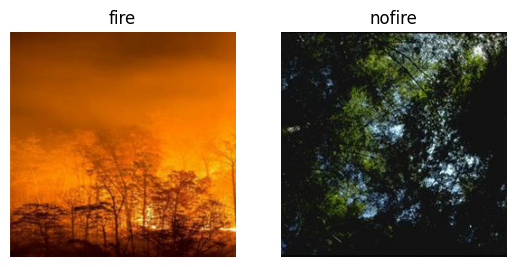

In [36]:
plt.figure()
plt.subplot(1, 2, 1)
fire_img = view_random_image("Dataset/Train/", "fire")
plt.subplot(1, 2, 2)
nofire_img = view_random_image("Dataset/Train/", "nofire")

Image shape: (250, 250, 3)


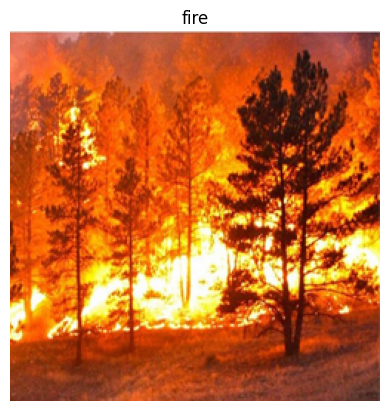

In [63]:
img = view_random_image(target_dir="Dataset/Train/",
                        target_class="fire")

In [64]:
img.shape

(250, 250, 3)

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "Dataset/Train/"
test_dir = "Dataset/Test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# model_1 = Sequential([
#     Conv2D(filters=10,
#            kernel_size=3,
#            activation="relu",
#            input_shape=(224, 224, 3)),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(pool_size=2,
#               padding="valid"),
#     Conv2D(10, 3, activation="relu"),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(2),
#     Flatten(),
#     Dense(1, activation="sigmoid")
# ])

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [67]:
model_1 = Sequential([
    Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    BatchNormalization(),
    Conv2D(64, 3, activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, padding="valid"),
    Dropout(0.25),

    Conv2D(128, 3, activation="relu"),
    BatchNormalization(),
    Conv2D(128, 3, activation="relu"),
    BatchNormalization(),
    MaxPool2D(2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [68]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
48/48 [==============================] - 36s 546ms/step - loss: 0.2655 - accuracy: 0.9204 - val_loss: 2.3640 - val_accuracy: 0.5000
Epoch 2/5
48/48 [==============================] - 20s 412ms/step - loss: 0.1855 - accuracy: 0.9382 - val_loss: 2.1599 - val_accuracy: 0.5000
Epoch 3/5
48/48 [==============================] - 19s 401ms/step - loss: 0.1782 - accuracy: 0.9428 - val_loss: 2.3435 - val_accuracy: 0.5000
Epoch 4/5
48/48 [==============================] - 20s 423ms/step - loss: 0.1277 - accuracy: 0.9592 - val_loss: 1.3588 - val_accuracy: 0.5000
Epoch 5/5
48/48 [==============================] - 19s 399ms/step - loss: 0.1190 - accuracy: 0.9579 - val_loss: 1.1740 - val_accuracy: 0.5658


In [69]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                      

<Axes: >

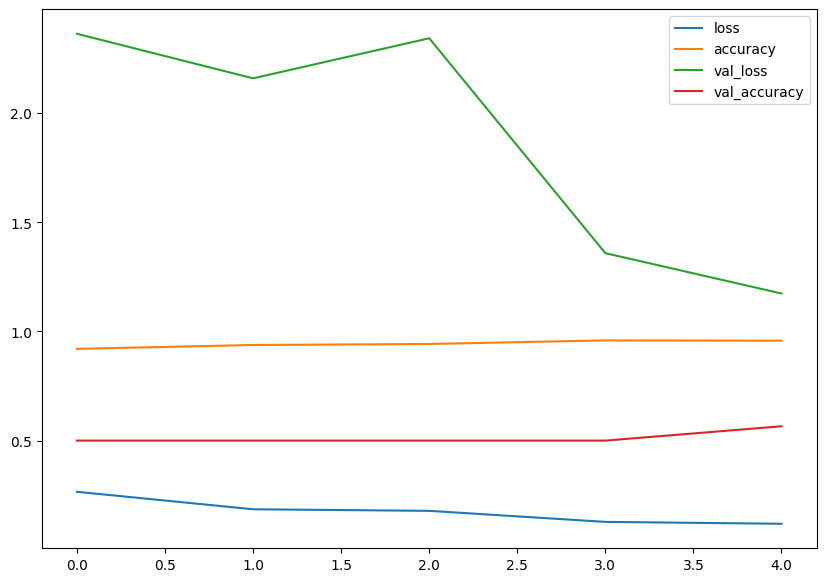

In [70]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

In [71]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)

model_1.evaluate(test_data)

test_predictions = model_1.predict(test_data)
test_predictions = np.squeeze(test_predictions)

binary_predictions = (test_predictions > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

test_labels = test_data.classes

accuracy = accuracy_score(test_labels, binary_predictions)
precision = precision_score(test_labels, binary_predictions)
recall = recall_score(test_labels, binary_predictions)
f1 = f1_score(test_labels, binary_predictions)
conf_matrix = confusion_matrix(test_labels, binary_predictions)

Found 380 images belonging to 2 classes.
12/12 [==============================] - 2s 123ms/step


In [72]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4921052631578947
Precision: 0.44
Recall: 0.05789473684210526
F1 Score: 0.10232558139534884


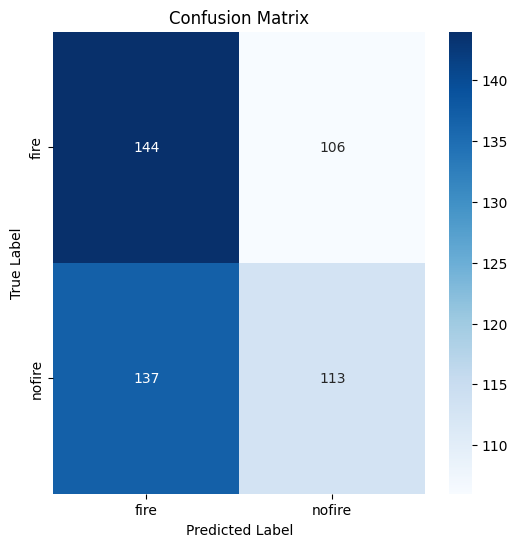

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = [[144, 106],
               [137, 113]]

class_names = ["fire", "nofire"]

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()

In [74]:
model_1.save("saved_model/")

In [75]:
from tensorflow.keras.models import load_model

loaded_model = load_model("saved_model")

In [76]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 1s 541ms/step


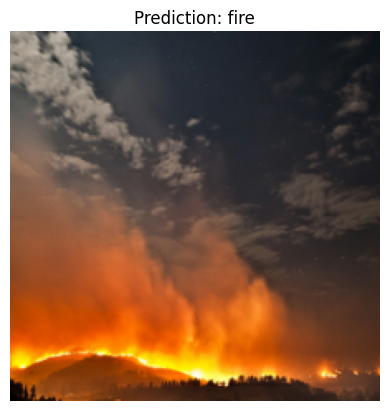

In [77]:
filename = "Dataset/Test/fire/fire_0174.jpg"
pred_and_plot(loaded_model, filename, class_names)